In [1]:
import pandas as pd
import numpy as np
from pydataset import data
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
df= sns.load_dataset('car_crashes')

In [7]:
df

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


### How do insurance premiums relate to car crash occurrences? Is there a correlation between higher premiums and increased accident rates?

In [6]:
correlation = df['ins_premium'].corr(df['total'])
correlation


-0.19970194568994232

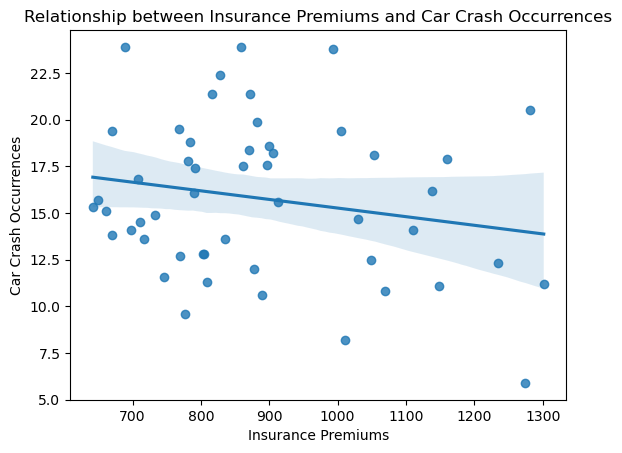

In [18]:
sns.regplot(x='ins_premium', y='total', data=df)
plt.xlabel('Insurance Premiums')
plt.ylabel('Car Crash Occurrences')
plt.title('Relationship between Insurance Premiums and Car Crash Occurrences')
plt.show()


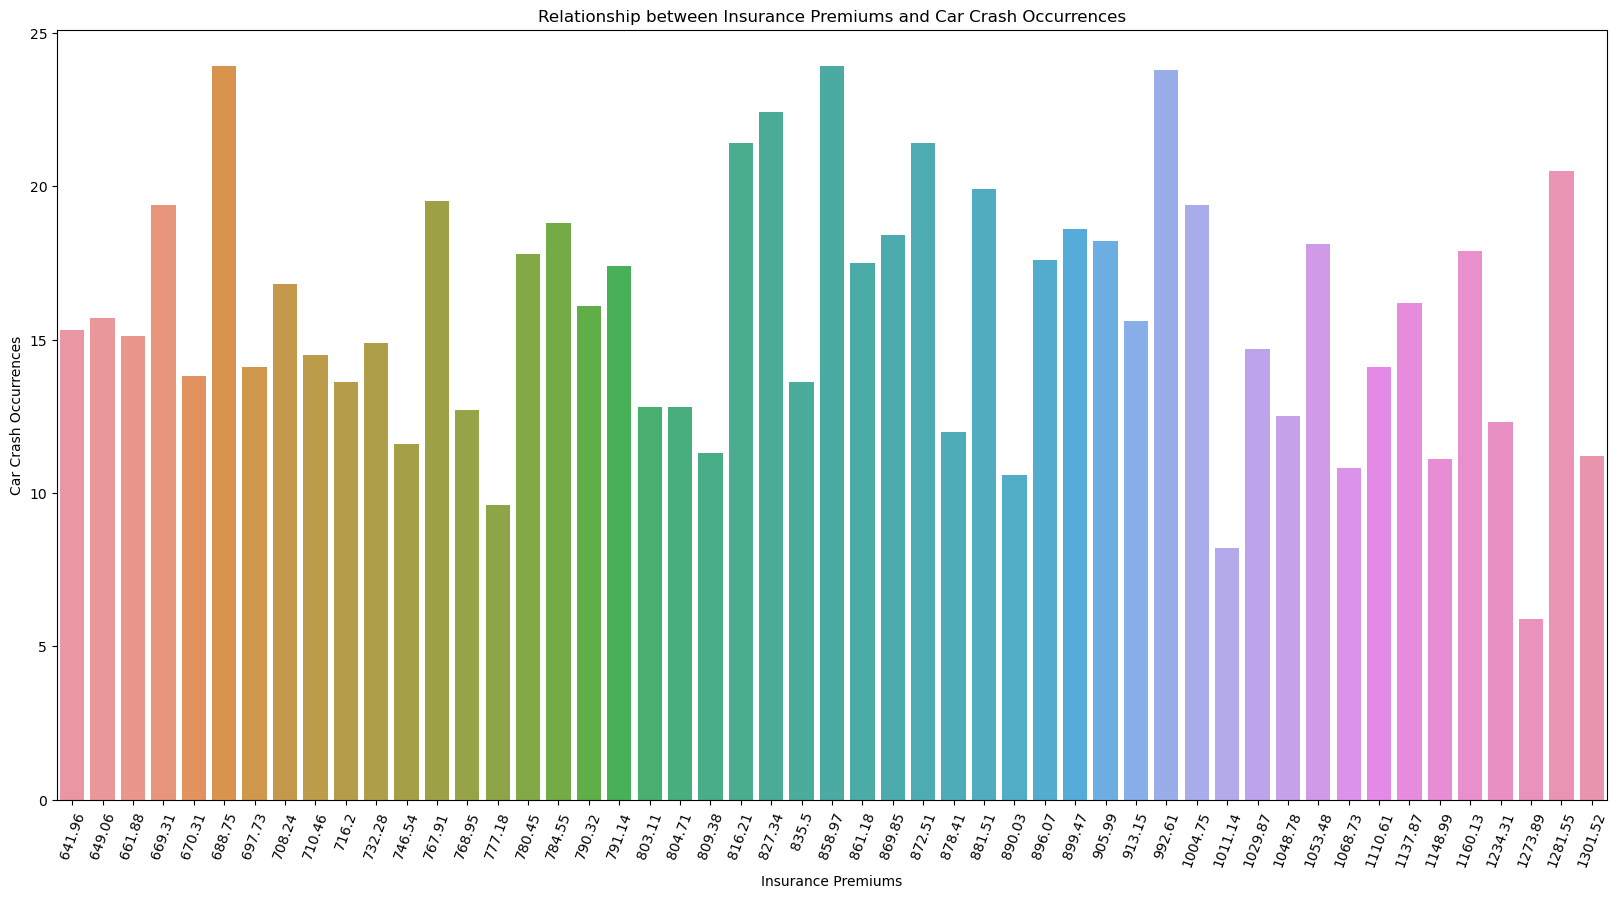

In [8]:
plt.figure(figsize=(20,10))
sns.barplot(x='ins_premium', y='total', data=df)
plt.xlabel('Insurance Premiums')
plt.ylabel('Car Crash Occurrences')
plt.title('Relationship between Insurance Premiums and Car Crash Occurrences')
plt.xticks(rotation=70)
plt.show()


### Can we identify any particular states (represented by the 'abbrev' column) with higher or lower rates of car crashes? Are there any regional trends or variations?

In [9]:
state_crash_rates = df.groupby('abbrev')['total'].mean().sort_values(ascending=False)

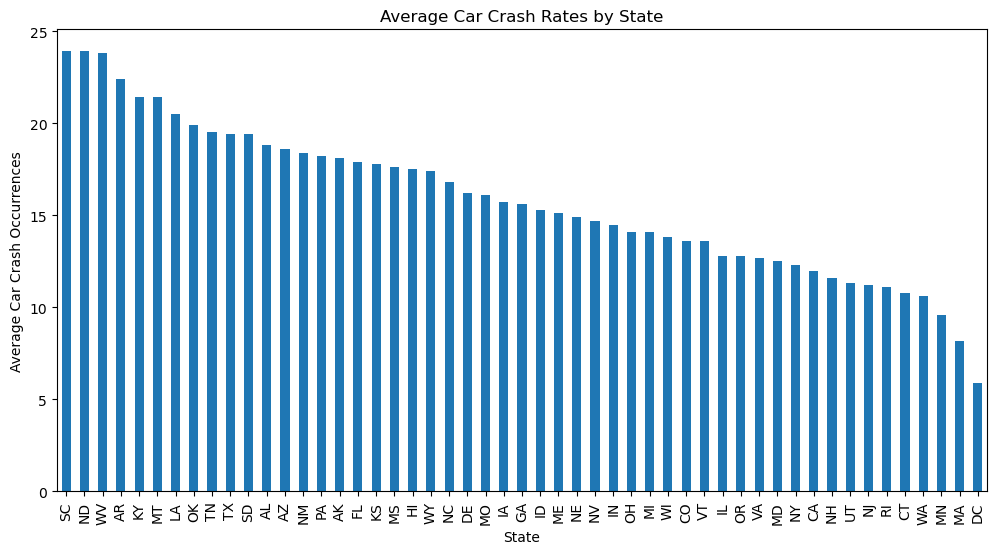

In [20]:
state_crash_rates.plot(kind='bar', figsize=(12, 6))
plt.xlabel('State')
plt.ylabel('Average Car Crash Occurrences')
plt.title('Average Car Crash Rates by State')
plt.xticks(rotation=90)
plt.show()


### How does the presence of alcohol contribute to car crashes? Can we identify any patterns or trends?

In [10]:
avg_crashes_alcohol = df[df['alcohol'] > 0]['total'].mean()
avg_crashes_no_alcohol = df[df['alcohol'] == 0]['total'].mean()

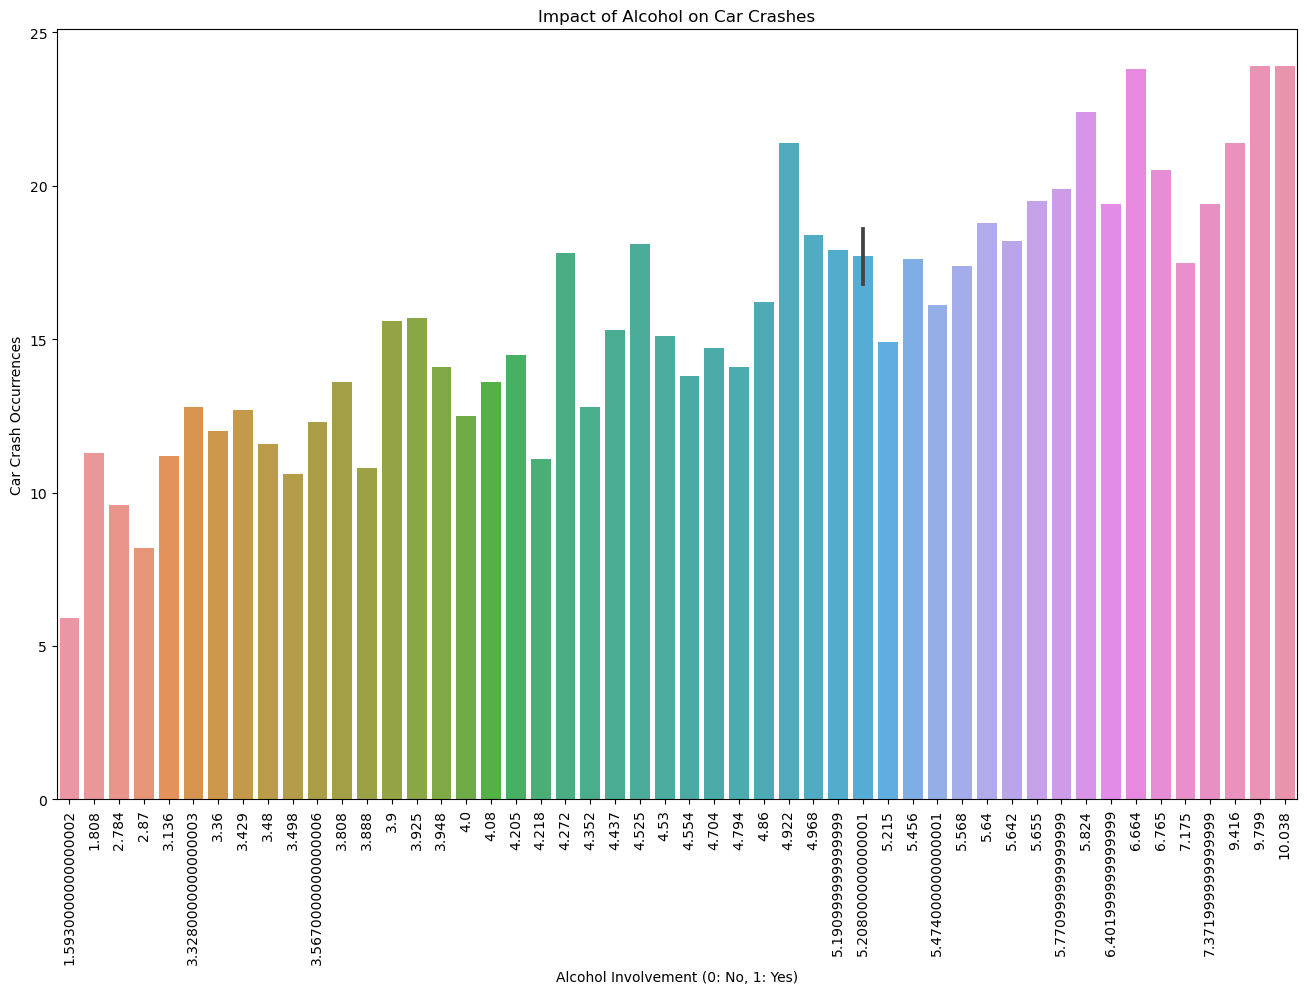

In [11]:
plt.figure(figsize=(16,10))
sns.barplot(x='alcohol', y='total', data=df)
plt.xlabel('Alcohol Involvement (0: No, 1: Yes)')
plt.ylabel('Car Crash Occurrences')
plt.title('Impact of Alcohol on Car Crashes')
plt.xticks(rotation=90)
plt.show()


### Is there evidence to suggest that drivers with no previous car crashes are more or less likely to be involved in accidents?

In [12]:
avg_crashes_previous = df[df['no_previous'] == 0]['total'].mean()
avg_crashes_no_previous = df[df['no_previous'] == 1]['total'].mean()

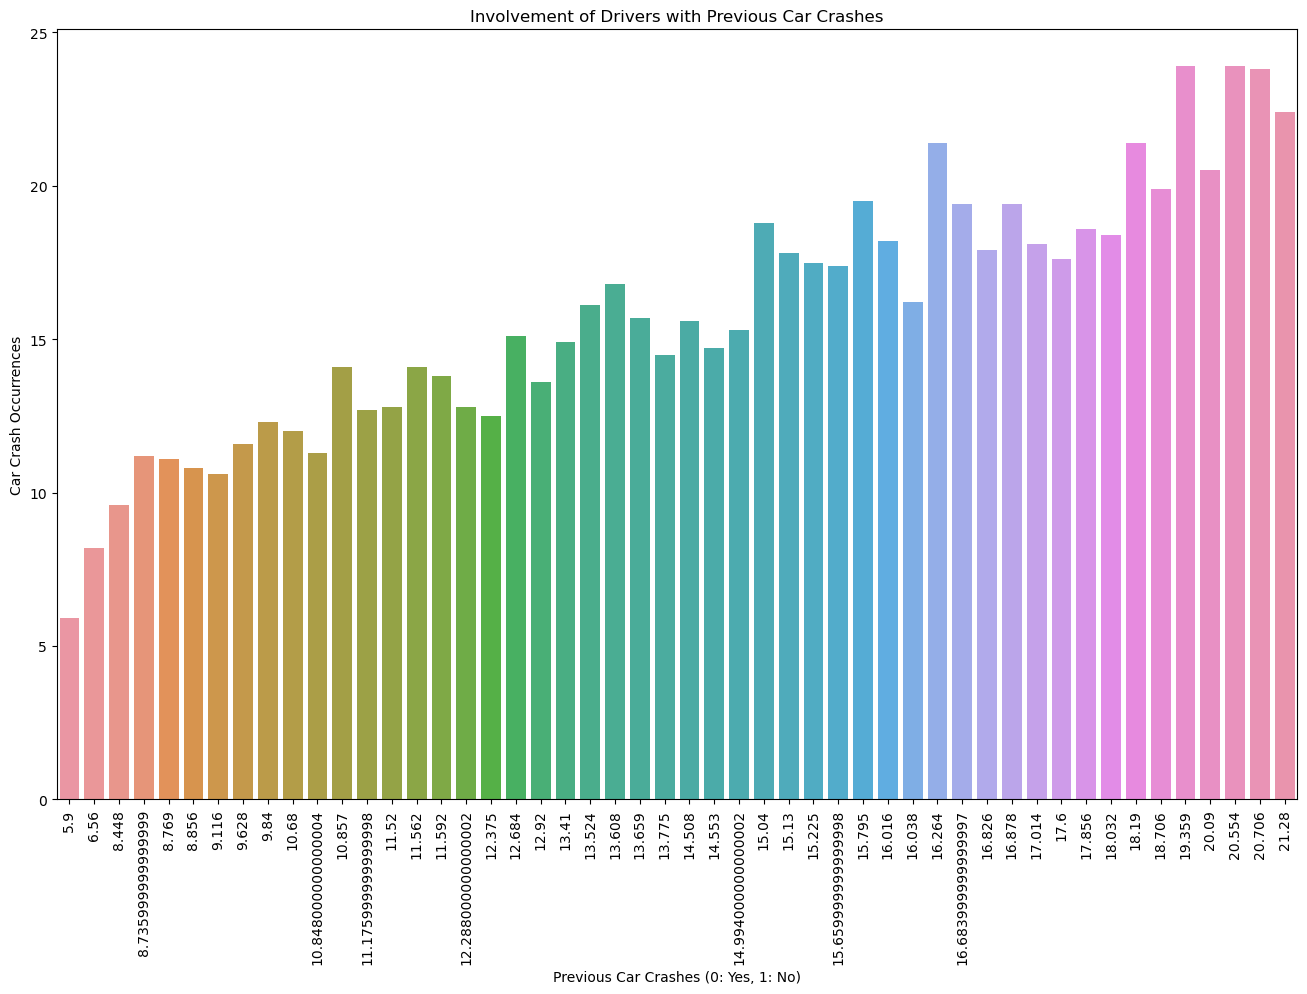

In [37]:
plt.figure(figsize=(16,10))
sns.barplot(x='no_previous', y='total', data=df)
plt.xlabel('Previous Car Crashes (0: Yes, 1: No)')
plt.ylabel('Car Crash Occurrences')
plt.title('Involvement of Drivers with Previous Car Crashes')
plt.xticks(rotation=90)
plt.show()


### Is there any correlation between speeding and the occurrence of car crashes? How significant is this relationship?

In [13]:
correlation = df['speeding'].corr(df['total'])
correlation

0.6115476008001183

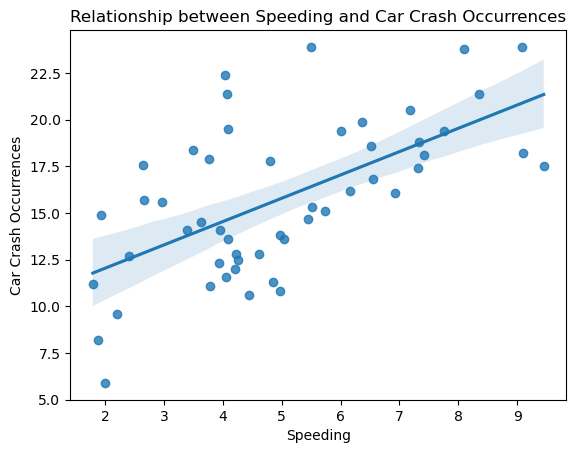

In [17]:
sns.regplot(x='speeding', y='total', data=df)
plt.xlabel('Speeding')
plt.ylabel('Car Crash Occurrences')
plt.title('Relationship between Speeding and Car Crash Occurrences')
plt.show()


### What proportion of car crashes involves drivers who were not distracted?

In [20]:
total_crashes = df.shape[0]
crashes_no_distraction = df[df['not_distracted'] == 'yes'].shape[0]

proportion_no_distraction = crashes_no_distraction / total_crashes

0.0

### Are there any significant differences in insurance losses associated with car crashes, based on the available data?

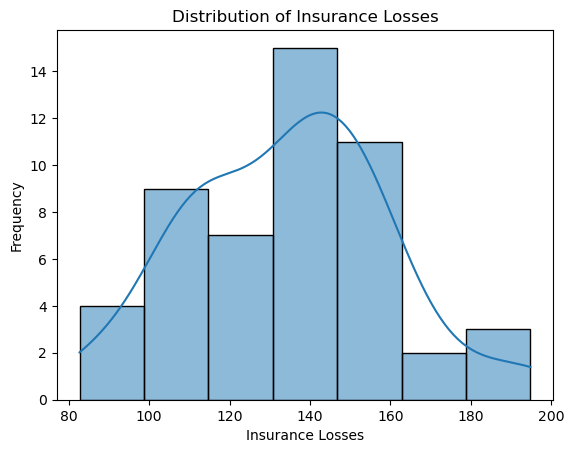

In [21]:
sns.histplot(df['ins_losses'], kde=True)
plt.xlabel('Insurance Losses')
plt.ylabel('Frequency')
plt.title('Distribution of Insurance Losses')
plt.show()
